# **4.1 Multiple Linear Regression Prediction**

<h2>Objective</h2><ul><li> How to make the prediction for multiple inputs.</li><li> How to use linear class to build more complex models.</li><li> How to build a custom module.</li></ul> 


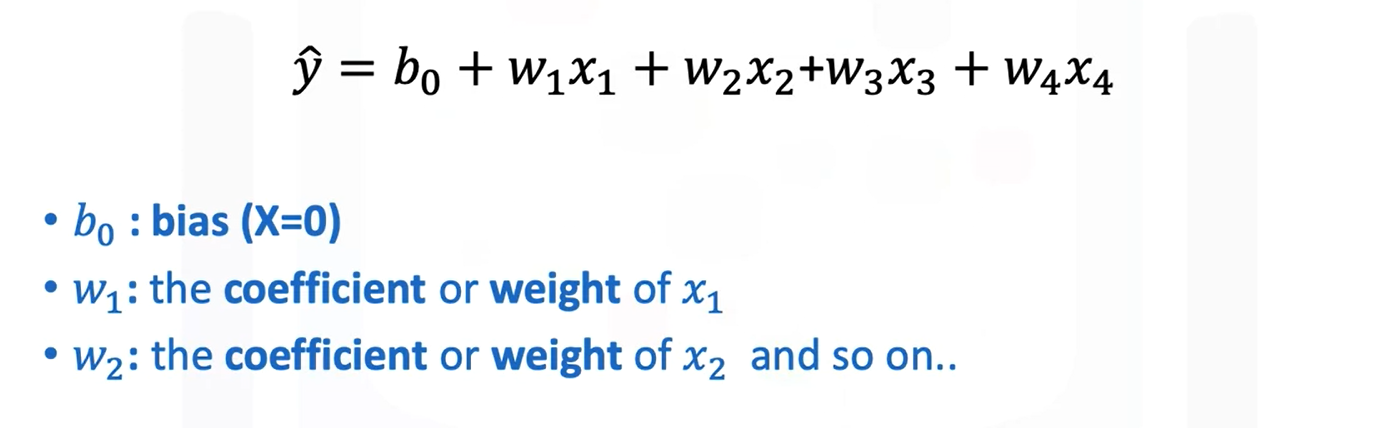

multiple predictor variables: bias, weight -> parameters of our model
D : dimensions
perform linear regression on multiple samples
ex) 4samples, 4 columns -> output of a trainloader object with 4 samples 
-> matrix X

**Linear Regression: operation of linear transformation**

1. x is a 1xD tensor/vector -> feature
2. w is a Dx1 tensor or vector of parameters
3. The dependent variable yhat

<h2>Preparation</h2>


Import the libraries and set the random seed.


In [5]:
# Import the libraries and set the random seed

from torch import nn
import torch
torch.manual_seed(1) # same results everytime we run the code, weight&bias initialized randomly

<h2 id="Prediction">Prediction</h2>


Set weight and bias.


In [6]:
# Set the weight and bias

w = torch.tensor([[2.0], [3.0]], requires_grad=True)
b = torch.tensor([[1.0]], requires_grad=True)

Define the parameters. <code>torch.mm</code> uses matrix multiplication instead of scaler multiplication.


In [7]:
# Define Prediction Function

def forward(x):
    yhat = torch.mm(x, w) + b
    return yhat

The function <code>forward</code> implements the following equation:


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter2/2.6.1_matrix_eq.png" width="600" alt="Matrix Linear Regression"/>


If we input a <i>1x2</i> tensor, because we have a <i>2x1</i> tensor as <code>w</code>, we will get a <i>1x1</i> tensor: 


In [8]:
# Calculate yhat

x = torch.tensor([[1.0, 2.0]])  # row vector / tensor with two columns
yhat = forward(x)
print("The result: ", yhat)

The result:  tensor([[9.]], grad_fn=<AddBackward0>)


<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter2/2.6.1example.png" width = "300" alt="Linear Regression Matrix Sample One" />


# Each row of the following tensor represents a sample:


In [9]:
# Sample tensor X

X = torch.tensor([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]])

In [10]:
# Make the prediction of X 

yhat = forward(X)
print("The result: ", yhat)

The result:  tensor([[ 6.],
        [ 9.],
        [12.]], grad_fn=<AddBackward0>)


<h2 id="Linear">Class Linear</h2>


We can use the linear class to make a prediction. You'll also use the linear class to build more complex models.  
-> 선을 이용하여 집단을 두개 이상으로 분류하는 모델  
-> Classifier가 내놓은 결과 값에 대해 제대로 분류를 했나 평가를 하기 위해서, 정답 레이블과 비교를 합니다. 비교를 해주는 함수가 바로 Loss 함수 입니다.


Let us create a model.


In [11]:
# Make a linear regression model using build-in function

model = nn.Linear(2, 1) # in_features:size of each input sample(x) or the number of columns.(number of weights) / out_features:size of each output sample
 # it creates y_hat=xw + b 

In [ ]:
list(model.parameters())

Make a prediction with the first sample:


In [14]:
# Make a prediction of x

yhat = model(x)
print("The result: ", yhat)

The result:  tensor([[-0.3969]], grad_fn=<AddmmBackward>)


Predict with multiple samples <code>X</code>: 


In [ ]:
# Sample tensor X

X = torch.tensor([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]])

In [ ]:
# Make a prediction of X

yhat = model(X)
print("The result: ", yhat)

The result:  tensor([[-0.0848],
        [-0.3969],
        [-0.7090]], grad_fn=<AddmmBackward>)


The function performs matrix multiplication as shown in this image:


<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter2/2.6.1multi_sample_example.png" width = "600" alt="Linear Regression Matrix Sample One" />


<h2 id="Cust">Build Custom Modules </h2>


Now, you'll build a custom module. You can make more complex models by using this method later. 


In [ ]:
# Create linear_regression Class
# nn.Modoule : 모든 뉴럴 네트워크 모듈의 기본 클래스로 일반적인 모델들은 이 클래스를 상속받아야한다.
# __init__() 메소드에는 신경망 레이어의 구성요소들을 정의하고, __forward__에서는 호출 될 때 수행되는 연산을 정의한다.
class linear_regression(nn.Module): # costume model linear_regression,this class is child of nn.Module
    
    # Constructor 
    def __init__(self, input_size, output_size): # object constructor: argument is the size of input and output (x,y)
        super(linear_regression, self).__init__() # call super in constructor: allows us to create objects from package nn.module inside the object without initializing explicitly,  nn.Module.__init__() 을 실행시키는 코드
        self.linear = nn.Linear(input_size, output_size) # create object of type linear 
    
    # Prediction function
    def forward(self, x): # use forward to produce prediction. no need to call forward method explicitly, just use '( )' as it behaves like call method in python.
        yhat = self.linear(x) # class안에서 아무데서나 object of type linear를 부를 수 있다.
        return yhat

Build a linear regression object. The input feature size is two. 


In [ ]:
model = linear_regression(2, 1)

This will input the following equation:


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter2/2.6.1_matrix_eq.png" width="600" alt="Matrix Linear Regression" />


You can see the randomly initialized parameters by using the <code>parameters()</code> method:


In [ ]:
# Print model parameters 순서대로 weight, bias

print("The parameters: ", list(model.parameters()))

The parameters:  [Parameter containing:
tensor([[ 0.3319, -0.6657]], requires_grad=True), Parameter containing:
tensor([0.4241], requires_grad=True)]


You can also see the parameters by using the <code>state_dict()</code> method:


In [ ]:
# Print model parameters 위에와 같다는거 보여줌

print("The parameters: ", model.state_dict())

The parameters:  OrderedDict([('linear.weight', tensor([[ 0.3319, -0.6657]])), ('linear.bias', tensor([0.4241]))])


Now we input a 1x2 tensor, and we will get a 1x1 tensor.


In [ ]:
# Make a prediction of x

yhat = model(x)
print("The result: ", yhat)

The result:  tensor([[-0.5754]], grad_fn=<AddmmBackward>)


The shape of the output is shown in the following image: 


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter2/2.6.1_matrix_eq.png" width="600" alt="Matrix Linear Regression" />


Make a prediction for multiple samples:


In [ ]:
# Make a prediction of X

yhat = model(X)
print("The result: ", yhat)

The result:  tensor([[ 0.0903],
        [-0.5754],
        [-1.2411]], grad_fn=<AddmmBackward>)


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter2/2.6.1Multi_sample.png" width="600" alt="Multiple Samples Linear Regression" />


<h3>Practice</h3>


Build a model or object of type <code>linear_regression</code>. Using the <code>linear_regression</code> object will predict the following tensor: 


In [ ]:
# Practice: Build a model to predict the follow tensor.

X = torch.tensor([[11.0, 12.0, 13, 14], [11, 12, 13, 14]])

Double-click <b>here</b> for the solution.

<!-- Your answer is below:
model = linear_regression(4, 1)
yhat = model(X)
print("The result: ", yhat)
-->


In [ ]:
model = linear_regression(4, 1)
yhat = model(X)
print("The result: ", yhat)

The result:  tensor([[2.1062],
        [2.1062]], grad_fn=<AddmmBackward>)


# **4.2 Multiple Linear Regression Training**

<h1>Linear Regression Multiple Outputs</h1> 


<h2>Objective</h2><ul><li> How to create a complicated models using pytorch build in functions.</li></ul> 

- cost function & Gradient descent for Multiple Linear Regression


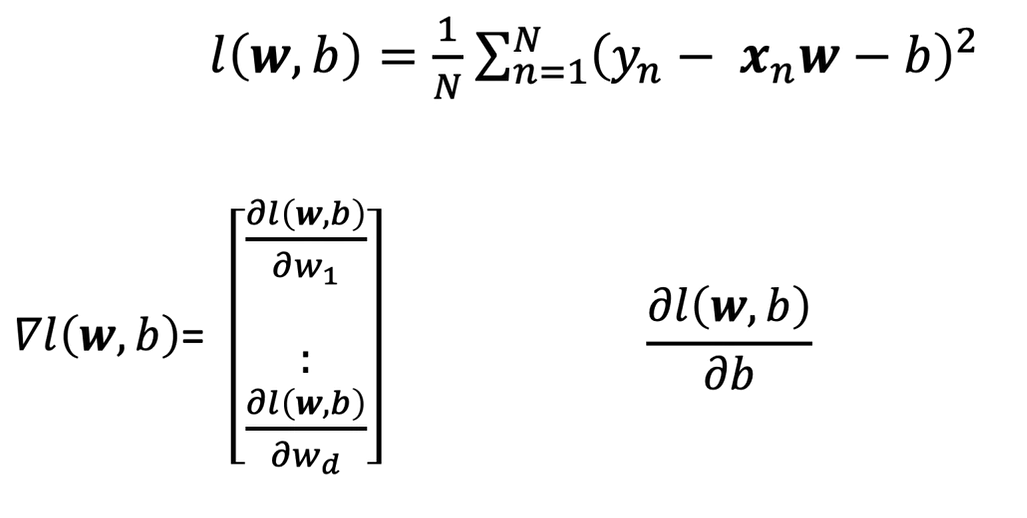

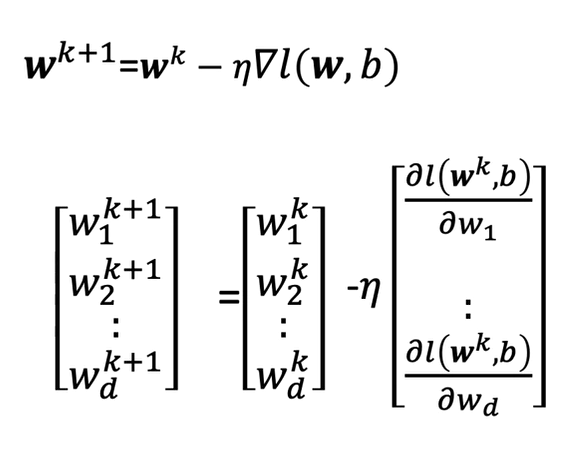

<h2>Preparation</h2>


In [15]:
# Import the libraries we need for this lab
# we update weights given by the following equation in Multiple Linear Regression Training
from torch import nn,optim
import torch
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader

In [16]:
# Set the random seed to 1. 

torch.manual_seed(1)

In [ ]:
# The function for plotting 2D

def Plot_2D_Plane(model, dataset, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()

    # Data
    x1 = data_set.x[:, 0].view(-1, 1).numpy()
    x2 = data_set.x[:, 1].view(-1, 1).numpy()
    y = data_set.y.numpy()

    # Make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b

    # Plotting
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot(x1[:, 0], x2[:, 0], y[:, 0],'ro', label='y') # Scatter plot
    
    ax.plot_surface(X, Y, yhat) # Plane plot
    
    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration:' + str(n))
    ax.legend()

    plt.show()

<h2 id=" #Makeup_Data" > Make Some Data </h2>


Create a dataset class with two-dimensional features:


In [17]:
# Create a 2D dataset

class Data2D(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:, 0] = torch.arange(-1, 1, 0.1) # 2 dimensions for input x(x1,x2)
        self.x[:, 1] = torch.arange(-1, 1, 0.1)
        self.w = torch.tensor([[1.0], [1.0]])
        self.b = 1
        self.f = torch.mm(self.x, self.w) + self.b    
        self.y = self.f + 0.1 * torch.randn((self.x.shape[0],1))
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self, index):          
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

Create a dataset object:


In [ ]:
# Create the dataset object

data_set = Data2D()

<h2 id="Model_Cost">Create the Model, Optimizer, and Total Loss Function (Cost)</h2>


Create a customized linear regression module: 


In [ ]:
# Create a customized linear

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

Create a model. Use two features: make the input size 2 and the output size 1: 


In [ ]:
# Create the linear regression model and print the parameters

model = linear_regression(2,1) # 2 input features, 1 output
print("The parameters: ", list(model.parameters()))

The parameters:  [Parameter containing:
tensor([[ 0.6209, -0.1178]], requires_grad=True), Parameter containing:
tensor([0.3026], requires_grad=True)]


Create an optimizer  object. Set the learning rate to 0.1. <b>Don't forget to enter the model parameters in the constructor.</b>


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter2/2.6.2paramater_hate.png" width = "100" alt="How the optimizer works" />


In [ ]:
# Create the optimizer

optimizer = optim.SGD(model.parameters(), lr=0.1)
# 우리가 data를 model에 입력했을 때, model은 그 data의 실제갑과 model의 예측값을 비교하여 loss를 알려준다. 
# SGD란 loss를 줄이기 위해 고안된 방법으로, loss의 미분을 이용하여 loss를 줄이는 것이 그 목표이다.

Create the criterion function that calculates the total loss or cost:


In [ ]:
# Create the cost function

criterion = nn.MSELoss()

Create a data loader object. Set the batch_size equal to 2: 


In [ ]:
# Create the data loader

train_loader = DataLoader(dataset=data_set, batch_size=2)

<h2 id="BGD">Train the Model via Mini-Batch Gradient Descent</h2>


Run 100 epochs of Mini-Batch Gradient Descent and store the total loss or cost for every iteration. Remember that this is an approximation of the true total loss or cost:


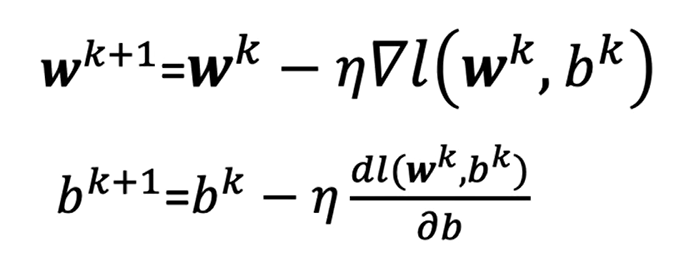

Gradient descent는, 대표적인 parameter 최적화방법으로, 매 iteration(혹은 시도)마다 각 parameter들의 gradient를 구해서 loss func를 최소화하는 방향으로 업데이트 해주는 최적화방식이다.

Pytorch에서는 gradients값들을 추후에 backward를 해줄때 계속 더해주기 때문"에 우리는 항상 backpropagation을 하기전에 gradients를 zero로 만들어주고 시작을 해야합니다. 이렇게 gradients을 더해주는 방식은 RNN을 학습시킬때 매우 편리한 방식입니다.

backward: 모델의 학습 가능한 모든 parameter에 대해 손실의 변화도를 계산합니다.
내부적으로 각 Module의 parameter는 requires_grad=True일 때 텐서에 저장되므로,
아래 호출은 모델의 모든 학습 가능한 parameter의 변화도를 계산하게 됩니다.

Before Training: 


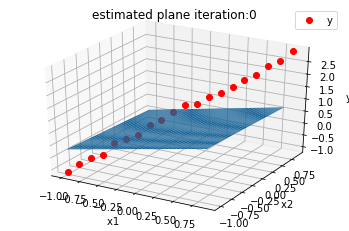

After Training: 


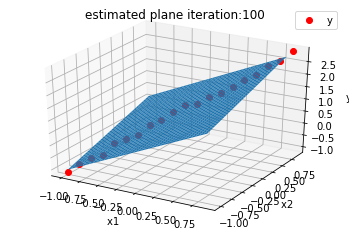

In [ ]:
# Train the model

LOSS = []
print("Before Training: ")
Plot_2D_Plane(model, data_set)   
epochs = 100
   
def train_model(epochs):    
    for epoch in range(epochs):
        for x,y in train_loader:
            yhat = model(x)
            loss = criterion(yhat, y) # calculate loss or cost
            LOSS.append(loss.item()) 
            optimizer.zero_grad() # set gradient to zero -> how pytorch calculate gradient?
            loss.backward() # differientiate loss respect to the parameters?
            optimizer.step() # apply method steps which updates the parameters. performs vector operations    
train_model(epochs)
print("After Training: ")
Plot_2D_Plane(model, data_set, epochs)  

### **cf) backward in numpy** 

In [ ]:
import numpy as np

# N은 배치 크기이며, D_in은 입력의 차원
# H는 은닉 계층의 차원이며, D_out은 출력 차원입니다:
# N, D_in, H, D_out = 64, 1000, 100, 10

# 데이터 생성
# x = np.random.randn(N, D_in)
# y = np.random.randn(N, D_out)

# 무작위로 가중치를 초기화
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(100):
    # 순전파 단계: 예측값 y를 계산합니다.
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)

    # 손실(loss)을 계산하고 출력합니다.
    loss = np.square(y_pred - y).sum()
    print(t, loss)

    # 손실에 따른 w1, w2의 변화도를 계산하고 backward
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # weight update
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

Text(0, 0.5, 'Cost/total loss ')

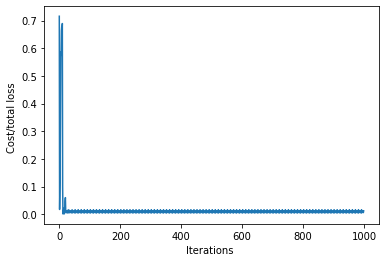

In [ ]:
# Plot out the Loss and iteration diagram

plt.plot(LOSS)
plt.xlabel("Iterations ")
plt.ylabel("Cost/total loss ")

<h3>Practice</h3>


Create a new <code>model1</code>. Train the model with a batch size 30 and learning rate 0.1, store the loss or total cost in a list <code>LOSS1</code>, and plot the results.


In [ ]:
# Practice create model1. Train the model with batch size 30 and learning rate 0.1, store the loss in a list <code>LOSS1</code>. Plot the results.

data_set = Data2D()

Double-click <b>here</b> for the solution.

<!-- Your answer is below:
train_loader = DataLoader(dataset = data_set, batch_size = 30)
model1 = linear_regression(2, 1)
optimizer = optim.SGD(model1.parameters(), lr = 0.1)
LOSS1 = []
epochs = 100
def train_model(epochs):    
    for epoch in range(epochs):
        for x,y in train_loader:
            yhat = model1(x)
            loss = criterion(yhat,y)
            LOSS1.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()     
train_model(epochs)
Plot_2D_Plane(model1 , data_set)  
plt.plot(LOSS1)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")
-->


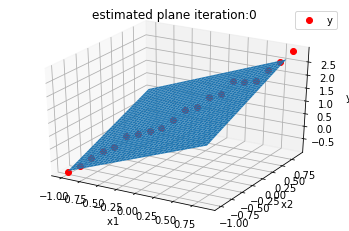

Text(0, 0.5, 'Cost/total loss ')

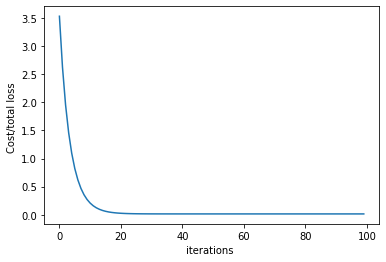

In [ ]:
train_loader = DataLoader(dataset = data_set, batch_size = 30)
model1 = linear_regression(2, 1)
optimizer = optim.SGD(model1.parameters(), lr = 0.1)
LOSS1 = []
epochs = 100
def train_model(epochs):    
    for epoch in range(epochs):
        for x,y in train_loader:
            yhat = model1(x)
            loss = criterion(yhat,y)
            LOSS1.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()     
train_model(epochs)
Plot_2D_Plane(model1 , data_set)  
plt.plot(LOSS1)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")

Use the following validation data to calculate the total loss or cost for both models:


In [ ]:
torch.manual_seed(2)

validation_data = Data2D()
Y = validation_data.y
X = validation_data.x

Double-click <b>here</b> for the solution.

<!-- Your answer is below:
print("total loss or cost for model: ",criterion(model(X),Y))
print("total loss or cost for model: ",criterion(model1(X),Y))
-->


In [ ]:
print("total loss or cost for model: ",criterion(model(X),Y))
print("total loss or cost for model: ",criterion(model1(X),Y))

total loss or cost for model:  tensor(0.0081, grad_fn=<MseLossBackward>)
total loss or cost for model:  tensor(0.0108, grad_fn=<MseLossBackward>)


# **4.3.linear regression with multiple outputs**

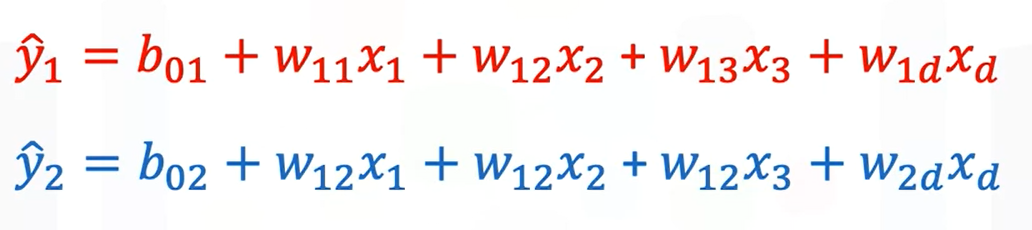

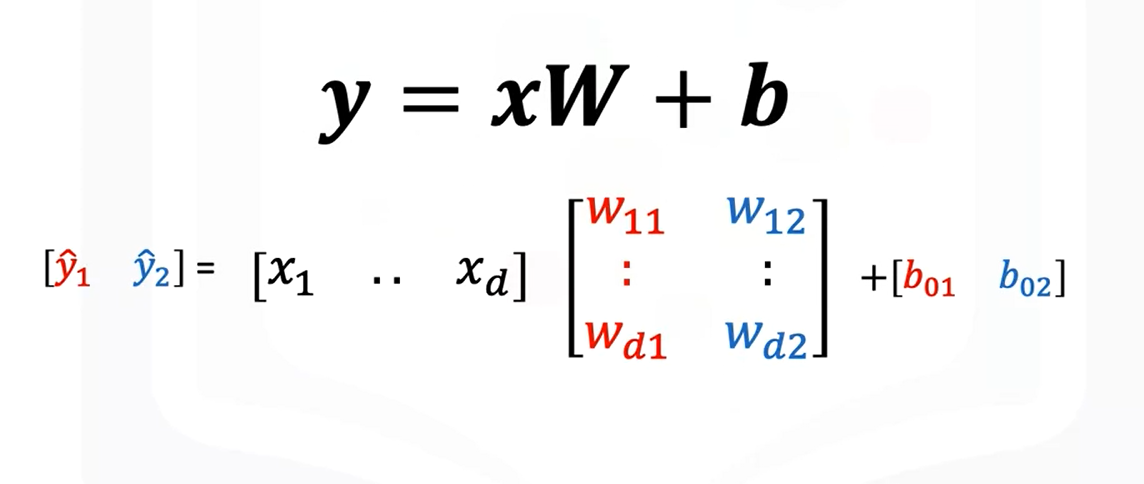

<a id="ref1"></a>

<h2 align=center>Class Linear  </h2>


In [21]:
from torch import nn
import torch

In [22]:
torch.manual_seed(1)

In [23]:
class linear_regression(nn.Module):
    def __init__(self,input_size,output_size):
        super(linear_regression,self).__init__()
        self.linear=nn.Linear(input_size,output_size)
    def forward(self,x):
        yhat=self.linear(x)
        return yhat

create a linear regression  object, as our input and output will be two we set the parameters accordingly 


<img src = "https://ibm.box.com/shared/static/icmwnxru7nytlhnq5x486rffea9ncpk7.png" width = 600, align = "center">


In [27]:
model = linear_regression(2,2) # number of rows of x(or w), number of columns of x(or bias)
x = torch.tensor([[1.0,2.0]]) # for 1 tensor, 2 outputs
yhat=model(x)
print(yhat)

tensor([[1.3877, 0.8562]], grad_fn=<AddmmBackward>)


In [28]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.4215,  0.3843],
         [-0.6912,  0.4383]], requires_grad=True), Parameter containing:
 tensor([0.1975, 0.6707], requires_grad=True)]

each row in the following tensor represents a different sample 


 <img src = "https://ibm.box.com/shared/static/768cul6pj8hc93uh9ujpajihnp8xdukx.png" width = 600, align = "center">


we can make a prediction using multiple samples 


In [ ]:
X=torch.tensor([[1.0,1.0],[1.0,2.0],[1.0,3.0]])

In [ ]:
Yhat=model(X)
Yhat

tensor([[ 0.7926, -0.3920,  0.1714,  0.0797, -1.0143,  0.5097, -0.0608,  0.5047,
          1.0132,  0.1887],
        [ 0.7926, -0.3920,  0.1714,  0.0797, -1.0143,  0.5097, -0.0608,  0.5047,
          1.0132,  0.1887],
        [ 1.8232, -1.2748, -0.2164,  1.0184, -2.8972,  1.7091, -0.4722,  1.5222,
          1.2912, -0.0561]], grad_fn=<AddmmBackward>)

the following figure represents the operation, where the red and blue  represents the different parameters, and the different shades of green represent  different samples.


# **4.4 training multiple output linear regression**

<h1>Linear Regression Multiple Outputs</h1> 
위에랑 다 똑같고 weight가 matrix인것만 다름, bias: vector

In [29]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

In [30]:
torch.manual_seed(1)

<a id="ref0"></a>

<h2 align=center>Make Some Data </h2>
Create a dataset class with two-dimensional features and two targets: 


In [31]:
from torch.utils.data import Dataset, DataLoader
class Data2D(Dataset):
    def __init__(self):
            self.x=torch.zeros(20,2)
            self.x[:,0]=torch.arange(-1,1,0.1)
            self.x[:,1]=torch.arange(-1,1,0.1)
            self.w=torch.tensor([ [1.0,-1.0],[1.0,3.0]])
            self.b=torch.tensor([[1.0,-1.0]])
            self.f=torch.mm(self.x,self.w)+self.b
            
            self.y=self.f+0.001*torch.randn((self.x.shape[0],1))
            self.len=self.x.shape[0]

    def __getitem__(self,index):

        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

create a dataset object 


In [ ]:
data_set=Data2D()

<a id="ref1"></a>

<h2 align=center>Create the Model, Optimizer, and Total Loss Function (cost)</h2>


Create a custom module:


In [ ]:
class linear_regression(nn.Module):
    def __init__(self,input_size,output_size):
        super(linear_regression,self).__init__()
        self.linear=nn.Linear(input_size,output_size)
    def forward(self,x):
        yhat=self.linear(x)
        return yhat

Create an optimizer object and set the learning rate to 0.1. **Don't forget to enter the model parameters in the constructor.**  


In [ ]:
model=linear_regression(2,2)

Create an optimizer object and set the learning rate to 0.1. **Don't forget to enter the model parameters in the constructor.**  


<img src = "https://ibm.box.com/shared/static/f8hskuwrnctjg21agud69ddla0jkbef5.png" width = 100, align = "center">


In [ ]:
optimizer = optim.SGD(model.parameters(), lr = 0.1)

Create the criterion function that calculates the total loss or cost:


In [ ]:
criterion = nn.MSELoss()

Create a data loader object and set the batch_size to 5:


In [ ]:
train_loader=DataLoader(dataset=data_set,batch_size=5)

<a id="ref2"></a>

<h2 align=center>Train the Model via Mini-Batch Gradient Descent </h2>


Run 100 epochs of Mini-Batch Gradient Descent and store the total loss or cost for every iteration. Remember that this is an approximation of the true total loss or cost.


In [ ]:
LOSS=[]
 
epochs=100
   
for epoch in range(epochs):
    for x,y in train_loader:
        #make a prediction 
        yhat=model(x)
        #calculate the loss
        loss=criterion(yhat,y)
        #store loss/cost 
        LOSS.append(loss.item())
        #clear gradient 
        optimizer.zero_grad()
        #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        #the step function on an Optimizer makes an update to its parameters
        optimizer.step()
     

Plot the cost:


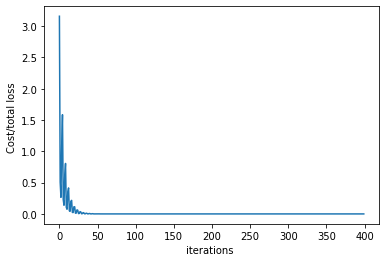

In [ ]:
plt.plot(LOSS)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")
plt.show()